In [1]:
%pylab inline
import sys
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages/yt-3.2.dev0-py2.7-linux-x86_64.egg')
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages')
sys.path.append('/global/homes/d/dorislee/mypythonpackages')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import yt
yt.funcs.mylog.setLevel(50) #coerce output null

In [3]:
cd ~/ramses/trunk/ramses/

/global/u2/d/dorislee/ramses/trunk/ramses


In [4]:
def plot_time(physical_quantity,timestep):
    ds= yt.load("bin/output_0000{0}/info_0000{0}.txt".format(timestep))
    proj = yt.ProjectionPlot(ds, "z",physical_quantity ,window_size=5)
    proj.set_cmap("density","rainbow")
    proj.annotate_velocity()
    proj.annotate_grids()
    proj.show()


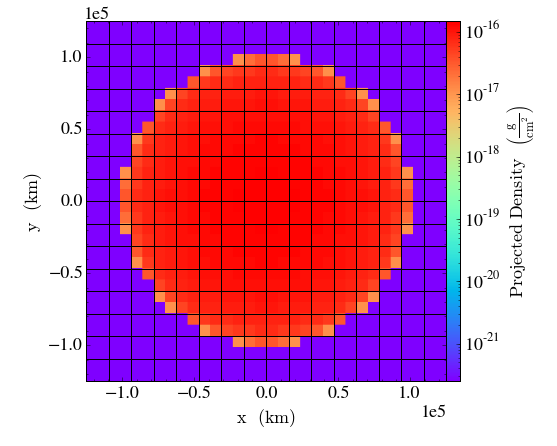


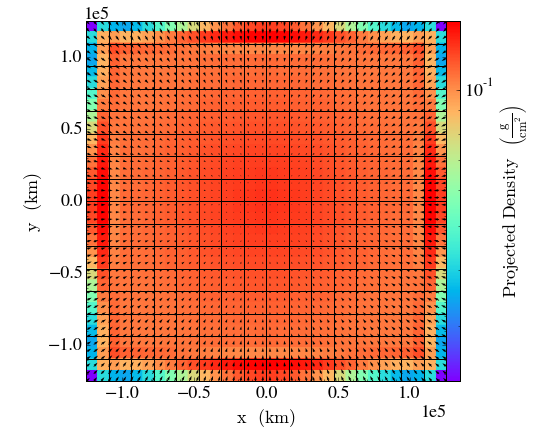


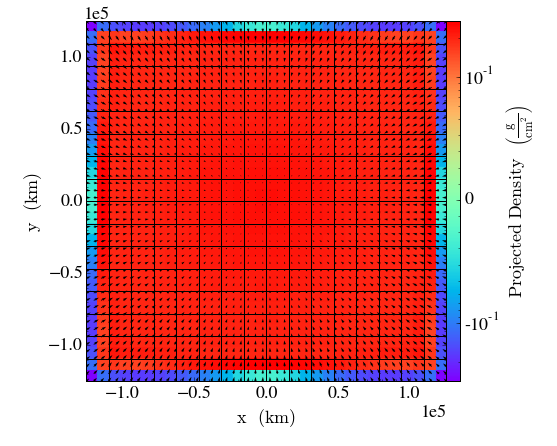

In [7]:
max_timestep = 4
for i in np.arange(1,max_timestep):
    plot_time("density",i)

### Trying to see what "coeur" looks like 

Looking at the condinit it looks like they set up a :
    
   - $B_x=B_y$=0, $B_z$= $\sqrt{4\pi/5}/0.53*crit$ (not too sure what this B_z is )
   - normalize d0 ,r0 to unity
   - set up custom user defined velocity fields which is just setting vx, vy, and vz with a bunch of sines and cosines (I think this is trying to simulate turbulence in ambient??)

In [ ]:
M=3 -DNPRE=8 -DNENER=0 -DNVAR=8 -DSOLVERmhd -DWITHOUTMPI -c ../mhd/godunov_fine.f90 -o godunov_fine.o
../mhd/godunov_fine.f90:615.12:

  if(ischeme.eq.1)then
            1
Error: Symbol 'ischeme' at (1) has no IMPLICIT type
make: *** [godunov_fine.o] Error 1

Crash on weird bugs, resolved by copying the Makefile from bitbucket and replacing my local version, there may have been updates and stuff...

sucessfully compile hydro
- mhd with no pathc NVAR = 8
- mhd with patch coeur NVAR = 8

Try setting NENER as non zero value and see if it helps with the code 

Can not compile properly if I set NENER as =1 I think this might actually be something jsut used in RHD 